In [2]:
import pandas as pd
import numpy as np
import os
import glob
from pathlib import Path
import glob
import json
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sn
import krippendorff as kd

In [3]:
"""
Separating the list of lists
"""
def schools(path):
    f = open(path)
    Json_Data = json.load(f)
    res = []
    for key, val in Json_Data.items():
        res.append([key] + val)

    tenca1 = res[0][1:]
    tenca2 = res[1][1:]
    majorana_setti1 = res[2][1:]
    alessandrini_titolivio1 = res[3][1:]
    mariecurie_cernusco1 = res[4][1:]
    tenca3 = res[5][1:]
    bachelet_abbiategrasso = res[6][1:]
    
    return tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso

In [4]:
"""
Creating the precdiction list of the schools set using mode
"""

def Mode(list):
    
    mode_list = []
    for i in list:
        j = st.mode(i)
        mode_list.append(j)
    
    return mode_list

def predicted_annotations(tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso):
    Tenca1 = Mode(tenca1)
    Tenca2 = Mode(tenca2)
    Majorana_Setti1 = Mode(majorana_setti1)
    Alessandrini_Titolivio1 = Mode(alessandrini_titolivio1)
    Mariecurie_Cernusco1 = Mode(mariecurie_cernusco1)
    Tenca3 = Mode(tenca3)
    Bachelet_Abbiategrasso = Mode(bachelet_abbiategrasso)

    school_list = [Tenca1, Tenca2, Majorana_Setti1, Alessandrini_Titolivio1, Mariecurie_Cernusco1, Tenca3, Bachelet_Abbiategrasso]
    print(len(school_list))
    return school_list

In [5]:

"""
Creating the true annotation set using mode
""" 
def true_annotations(tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso):  
    true_list = []
    track = []
    for i in range(0,500):
        track.append(tenca1[i]+tenca2[i]+majorana_setti1[i]+alessandrini_titolivio1[i]+mariecurie_cernusco1[i]+tenca3[i]+bachelet_abbiategrasso[i])
    
    print(track)
    true_list= Mode(track) 
    
    return true_list

In [6]:
"""""""""""""""""""""""""""""Plotting the Confusion Matrix"""""""""""""""""""""""""""


def plot_confusion_matrix(C_M, classes):
    fig = plt.figure(figsize=(30, 20))
    ax = plt.subplot()
    sn.heatmap(C_M, annot=True, ax = ax, fmt = 'g')
    ax.set_xlabel('Predicted Annotations', fontsize=40)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(classes, fontsize = 40)
    ax.xaxis.tick_bottom()
    ax.set_ylabel('Actual Annotations', fontsize=40)
    ax.yaxis.set_ticklabels(classes, fontsize = 40)
    plt.yticks(rotation=0)
    plt.title('Refined Confusion Matrix', fontsize=60)
    plt.show()
    
def plot_intra_rater_agreement(bar_list, names):
    plt.figure(figsize=(10, 8))  # smaller plot size
    plt.bar(names, bar_list, color='black')  # plotting in black
    plt.xlabel('School Names', fontsize=14)  # smaller font size for labels
    plt.ylabel('Agreement (in %)', fontsize=14)  # smaller font size for labels
    plt.xticks(rotation=45, ha='right', fontsize=12)  # rotate x-axis labels for better visibility
    plt.yticks(fontsize=12)  # smaller font size for y-axis ticks
    plt.tight_layout()  # adjust layout to prevent overlap
    plt.show()

In [7]:
"""""""""""""""""""""""""""""Creating the Confusion Matrix"""""""""""""""""""""""""""

'""Creating the Confusion Matrix'

In [8]:
def confusion_matrix(classes,school_list,true_list):
    #Visualize actual cnfusion matrix
    num_classes = len(classes)
    C_M = pd.DataFrame(np.zeros((num_classes,num_classes), dtype = int), 
                       index = classes, columns = classes)
    for i in school_list:
        for t_label,p_label in zip(true_list,i):
        
            C_M.loc[str(t_label), str(p_label)] += 1

    print(C_M)
    #Visualize nomalized confusion matrix
    
    plot_confusion_matrix(C_M, classes)
    
    C_M_Normalized = C_M.astype('float') / C_M.max(axis=1)[:, np.newaxis]
    C_M_Normalized[np.isnan(C_M_Normalized)] = 0
    C_M_Normalized = np.round(C_M_Normalized, 3)

    print(C_M_Normalized)
    plot_confusion_matrix(C_M_Normalized, classes)
    
    return C_M


In [9]:
def merged_matrix(CM,num_classes, threshold):
    
    MM = CM
    classes = MM.index
    new_index = []
    for i in range(num_classes):
        max_val = MM.iloc[i].max()
        max_index = MM.iloc[i].idxmax()
        id = []
        
        for j in range(num_classes):
            if MM.iloc[i,j] > 0 and MM.iloc[i,j] / max_val >= threshold:
                id.append(j)
        #id.append(i)
        
        merged_class = "+".join([classes[k] for k in id])
        # add the merged class name to the new index list
        new_index.append(merged_class)

        for j in range(num_classes):
            if MM.iloc[i,j] > 0 and MM.iloc[i,j] / max_val <= threshold:
                MM.iloc[i,j] = 0
        
        
        for j in range(num_classes):
            c = 0
            if MM.iloc[i,j] > 0 and MM.iloc[i,j] / max_val > threshold:
                c+=MM.iloc[i,j]
                MM.iloc[i,j] = 0
            MM.iloc[i,i] += c
            
        print(list(set(id)))
    # set the new index on the confusion matrix
    MM.index = new_index 
    
    print(MM)
    
    
    plot_confusion_matrix(MM, new_index) 

    MM_Normalized = MM.astype('float') / MM.max(axis=1)[:, np.newaxis]
    MM_Normalized[np.isnan(MM_Normalized)] = 0
    MM_Normalized = np.round(MM_Normalized, 3)
    print(MM_Normalized)
    plot_confusion_matrix(MM_Normalized, classes) 
    
    return MM


In [10]:
def new_matrix(MM):
    #checking for row with 0 annotations
    num_classes = len(MM)
    sum_rows = MM.sum(axis=1)
    print("Sum of rows:\n", sum_rows)
    
    index = []
    for i in range (len(sum_rows)):
        if sum_rows[i] == 0:
            index.append(i)
            
    print(index)
    # drop rows with sum 0
    MM = MM.loc[sum_rows != 0]
    
    for col in MM.columns:
        if MM[col].sum() == 0:
            MM = MM.drop(columns=col)
        
    print(MM) 
    classes = MM.index
    plot_confusion_matrix(MM, classes)           

    MM_Normalized = MM.astype('float') / MM.max(axis=1)[:, np.newaxis]
    MM_Normalized[np.isnan(MM_Normalized)] = 0
    MM_Normalized = np.round(MM_Normalized, 3)
    print(MM_Normalized)
    plot_confusion_matrix(MM_Normalized, classes)   

    return MM, index        
   #Visualize merged confusion matrix
    """   
    m_m = []
    for i in range(num_classes):
        for j in range(num_classes):
            if i != j and CM.iloc[i,j]/CM.iloc[i].max() >= threshold:
                CM.iloc[i,i] += CM.iloc[i,j]
                CM.iloc[i,j] = 0
                       
    plot_confusion_matrix(CM, classes)
    """

In [11]:
def sub_matrix(MM, relevant_classes, irrelevant_classes):
    classes = ['relevant', 'irrelevant']
    SM = pd.DataFrame(np.zeros((2,2), dtype = int), 
                       index = classes, columns = classes)
    for i in range(len(MM)):
        for j in range(len(MM)):
            if str(i) in relevant_classes and str(j) in relevant_classes:
                SM.loc['relevant','relevant'] += MM.iloc[i,j]
            elif str(i) in relevant_classes and str(j) in irrelevant_classes:
                SM.loc['relevant','irrelevant'] += MM.iloc[i,j]
            elif str(i) in irrelevant_classes and str(j) in relevant_classes:
                SM.loc['irrelevant','relevant'] += MM.iloc[i,j]
            else:
                SM.loc['irrelevant','irrelevant'] += MM.iloc[i,j]

    print(SM)
    plot_confusion_matrix(SM, classes)


In [12]:
"""    
Annonator asgreement
"""
def IntraRater(list_of_lists):#Intra Rater
    min_len = min(len(L) for L in list_of_lists)
    list_of_lists = [L[:min_len] for L in list_of_lists]
    agreement = kd.alpha(np.array(list_of_lists).T)*100
   
    return agreement


In [13]:

######################################Execution#######################################
path = 'C:/Users/Aadiv Das/OneDrive - Università degli Studi di Milano/Desktop/Thesis/__annotator.json'

"""
classes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
classes_relevant = [5,6,7,8,9,11,12,13,14,16]
classes_irrelevant = [0,1,2,3,4,15,17]
"""
classes = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
classes_relevant = ['5','6','7','8','9','11','12','13','14','16']
classes_irrelevant = ['0','1','2','3','4','15','17']

num_classes = len(classes)
"""
 "Page border"= 0
    Erasure = 1
    Burr = 2
    "Printed Text" = 3
    "Manuscript Text" = 4
    "Pause (full or almost)" = 5
    "Single note (with at least the head)" = 6
    "Multiple Notes (with at least the head)" = 7
    "Single chord (with at least heads)" = 8
    "Multiple chords (with at least heads)" = 9
    "Accidental(s) (whole or nearly so)" = 10
    "Key(s) (whole(s) or nearly)" = 11
    "Embellishment(s) (whole(s) or nearly)" = 12
    "More categories (with at least one musical score)" = 14
    "More categories (no musical scores)" = 15
    "Other (with at least one musical score)" = 16
    "Other (without musical markings)" = 17
 """    

'\n "Page border"= 0\n    Erasure = 1\n    Burr = 2\n    "Printed Text" = 3\n    "Manuscript Text" = 4\n    "Pause (full or almost)" = 5\n    "Single note (with at least the head)" = 6\n    "Multiple Notes (with at least the head)" = 7\n    "Single chord (with at least heads)" = 8\n    "Multiple chords (with at least heads)" = 9\n    "Accidental(s) (whole or nearly so)" = 10\n    "Key(s) (whole(s) or nearly)" = 11\n    "Embellishment(s) (whole(s) or nearly)" = 12\n    "More categories (with at least one musical score)" = 14\n    "More categories (no musical scores)" = 15\n    "Other (with at least one musical score)" = 16\n    "Other (without musical markings)" = 17\n '

In [14]:
tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso = schools(path)


In [15]:
school_list = predicted_annotations(tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso)


7


In [16]:
true_list = true_annotations(tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso)


[[15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 17, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 12, 0, 12, 0, 12, 0, 0, 17, 17, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 17, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 17, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

       0    1    2    3    4  5   6   7   8  9  10  11  12  13  14  15  16  17
0   2105    0    2    0    0  0   0   0   0  0   0   0   0   0   0   0   0   7
1      0  165    0    0    6  0   0   1   0  0   0   0   0   0   8   2   0  21
2      5    0  254    0    0  0   4   3   0  0   0   4   0   0   7   1   0   2
3      1    0    0  104    0  0   0   0   0  0   0   0   0   0   0   0   0   0
4      2    5    3    0  251  0   1   1   0  0   1   0   2   0   3   1   0  10
5      0    0    0    0    0  0   0   0   0  0   0   0   0   0   0   0   0   0
6      0    1    0    0    0  0  57   3   1  0   0   0   2   0   6   0   0   0
7      0    0    1    0    0  0   0  86   0  4   0   0   4   0   3   0   4   3
8      0    0    0    0    0  0   2   3  15  0   0   0   0   0   1   0   0   0
9      0    0    0    0    0  0   0   7   0  7   0   0   0   0   0   0   0   0
10     0    0    0    0    0  0   0   0   0  0  33   0   0   0   2   0   0   0
11     0    0    0    0    0  0   0   0   0  0   0  

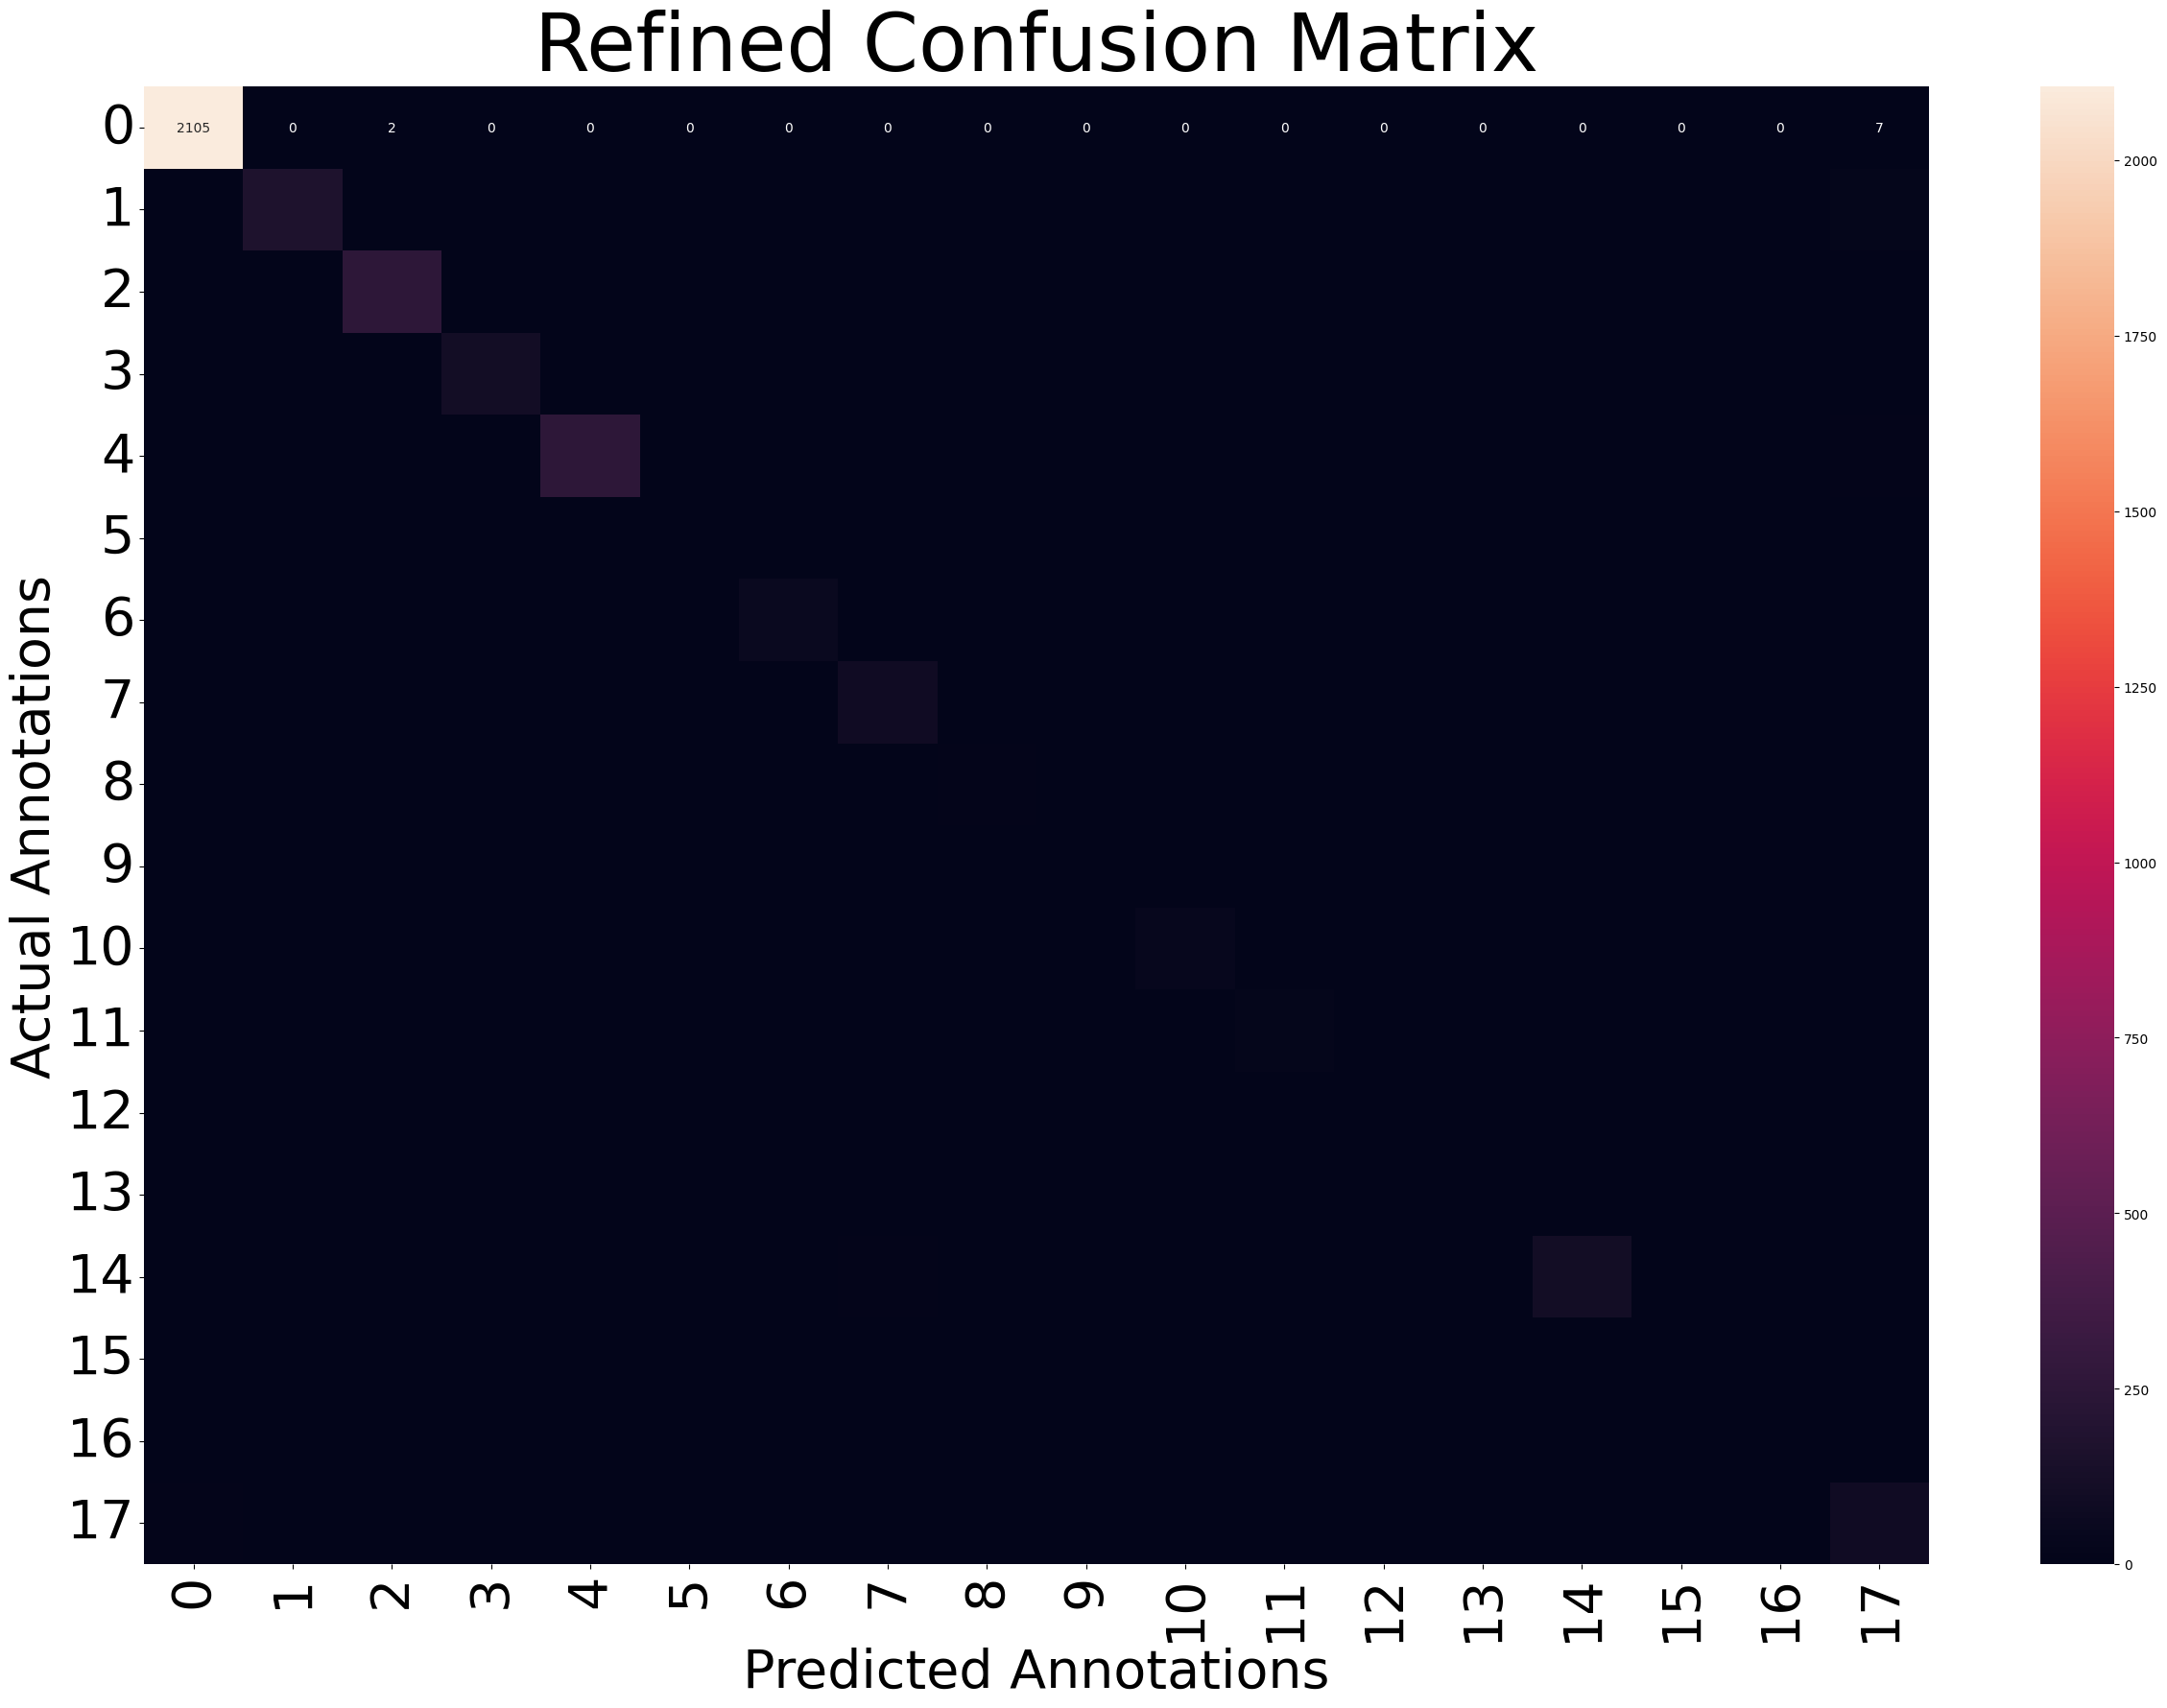

C:\Users\Aadiv Das\AppData\Local\Temp\ipykernel_9804\3114620315.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  C_M_Normalized = C_M.astype('float') / C_M.max(axis=1)[:, np.newaxis]


        0      1      2    3      4      5      6      7      8      9     10  \
0   1.000  0.000  0.001  0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
1   0.000  1.000  0.000  0.0  0.036  0.000  0.000  0.006  0.000  0.000  0.000   
2   0.020  0.000  1.000  0.0  0.000  0.000  0.016  0.012  0.000  0.000  0.000   
3   0.010  0.000  0.000  1.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
4   0.008  0.020  0.012  0.0  1.000  0.000  0.004  0.004  0.000  0.000  0.004   
5   0.000  0.000  0.000  0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
6   0.000  0.018  0.000  0.0  0.000  0.000  1.000  0.053  0.018  0.000  0.000   
7   0.000  0.000  0.012  0.0  0.000  0.000  0.000  1.000  0.000  0.047  0.000   
8   0.000  0.000  0.000  0.0  0.000  0.000  0.133  0.200  1.000  0.000  0.000   
9   0.000  0.000  0.000  0.0  0.000  0.000  0.000  1.000  0.000  1.000  0.000   
10  0.000  0.000  0.000  0.0  0.000  0.000  0.000  0.000  0.000  0.000  1.000   
11  0.000  0.000  0.000  0.0

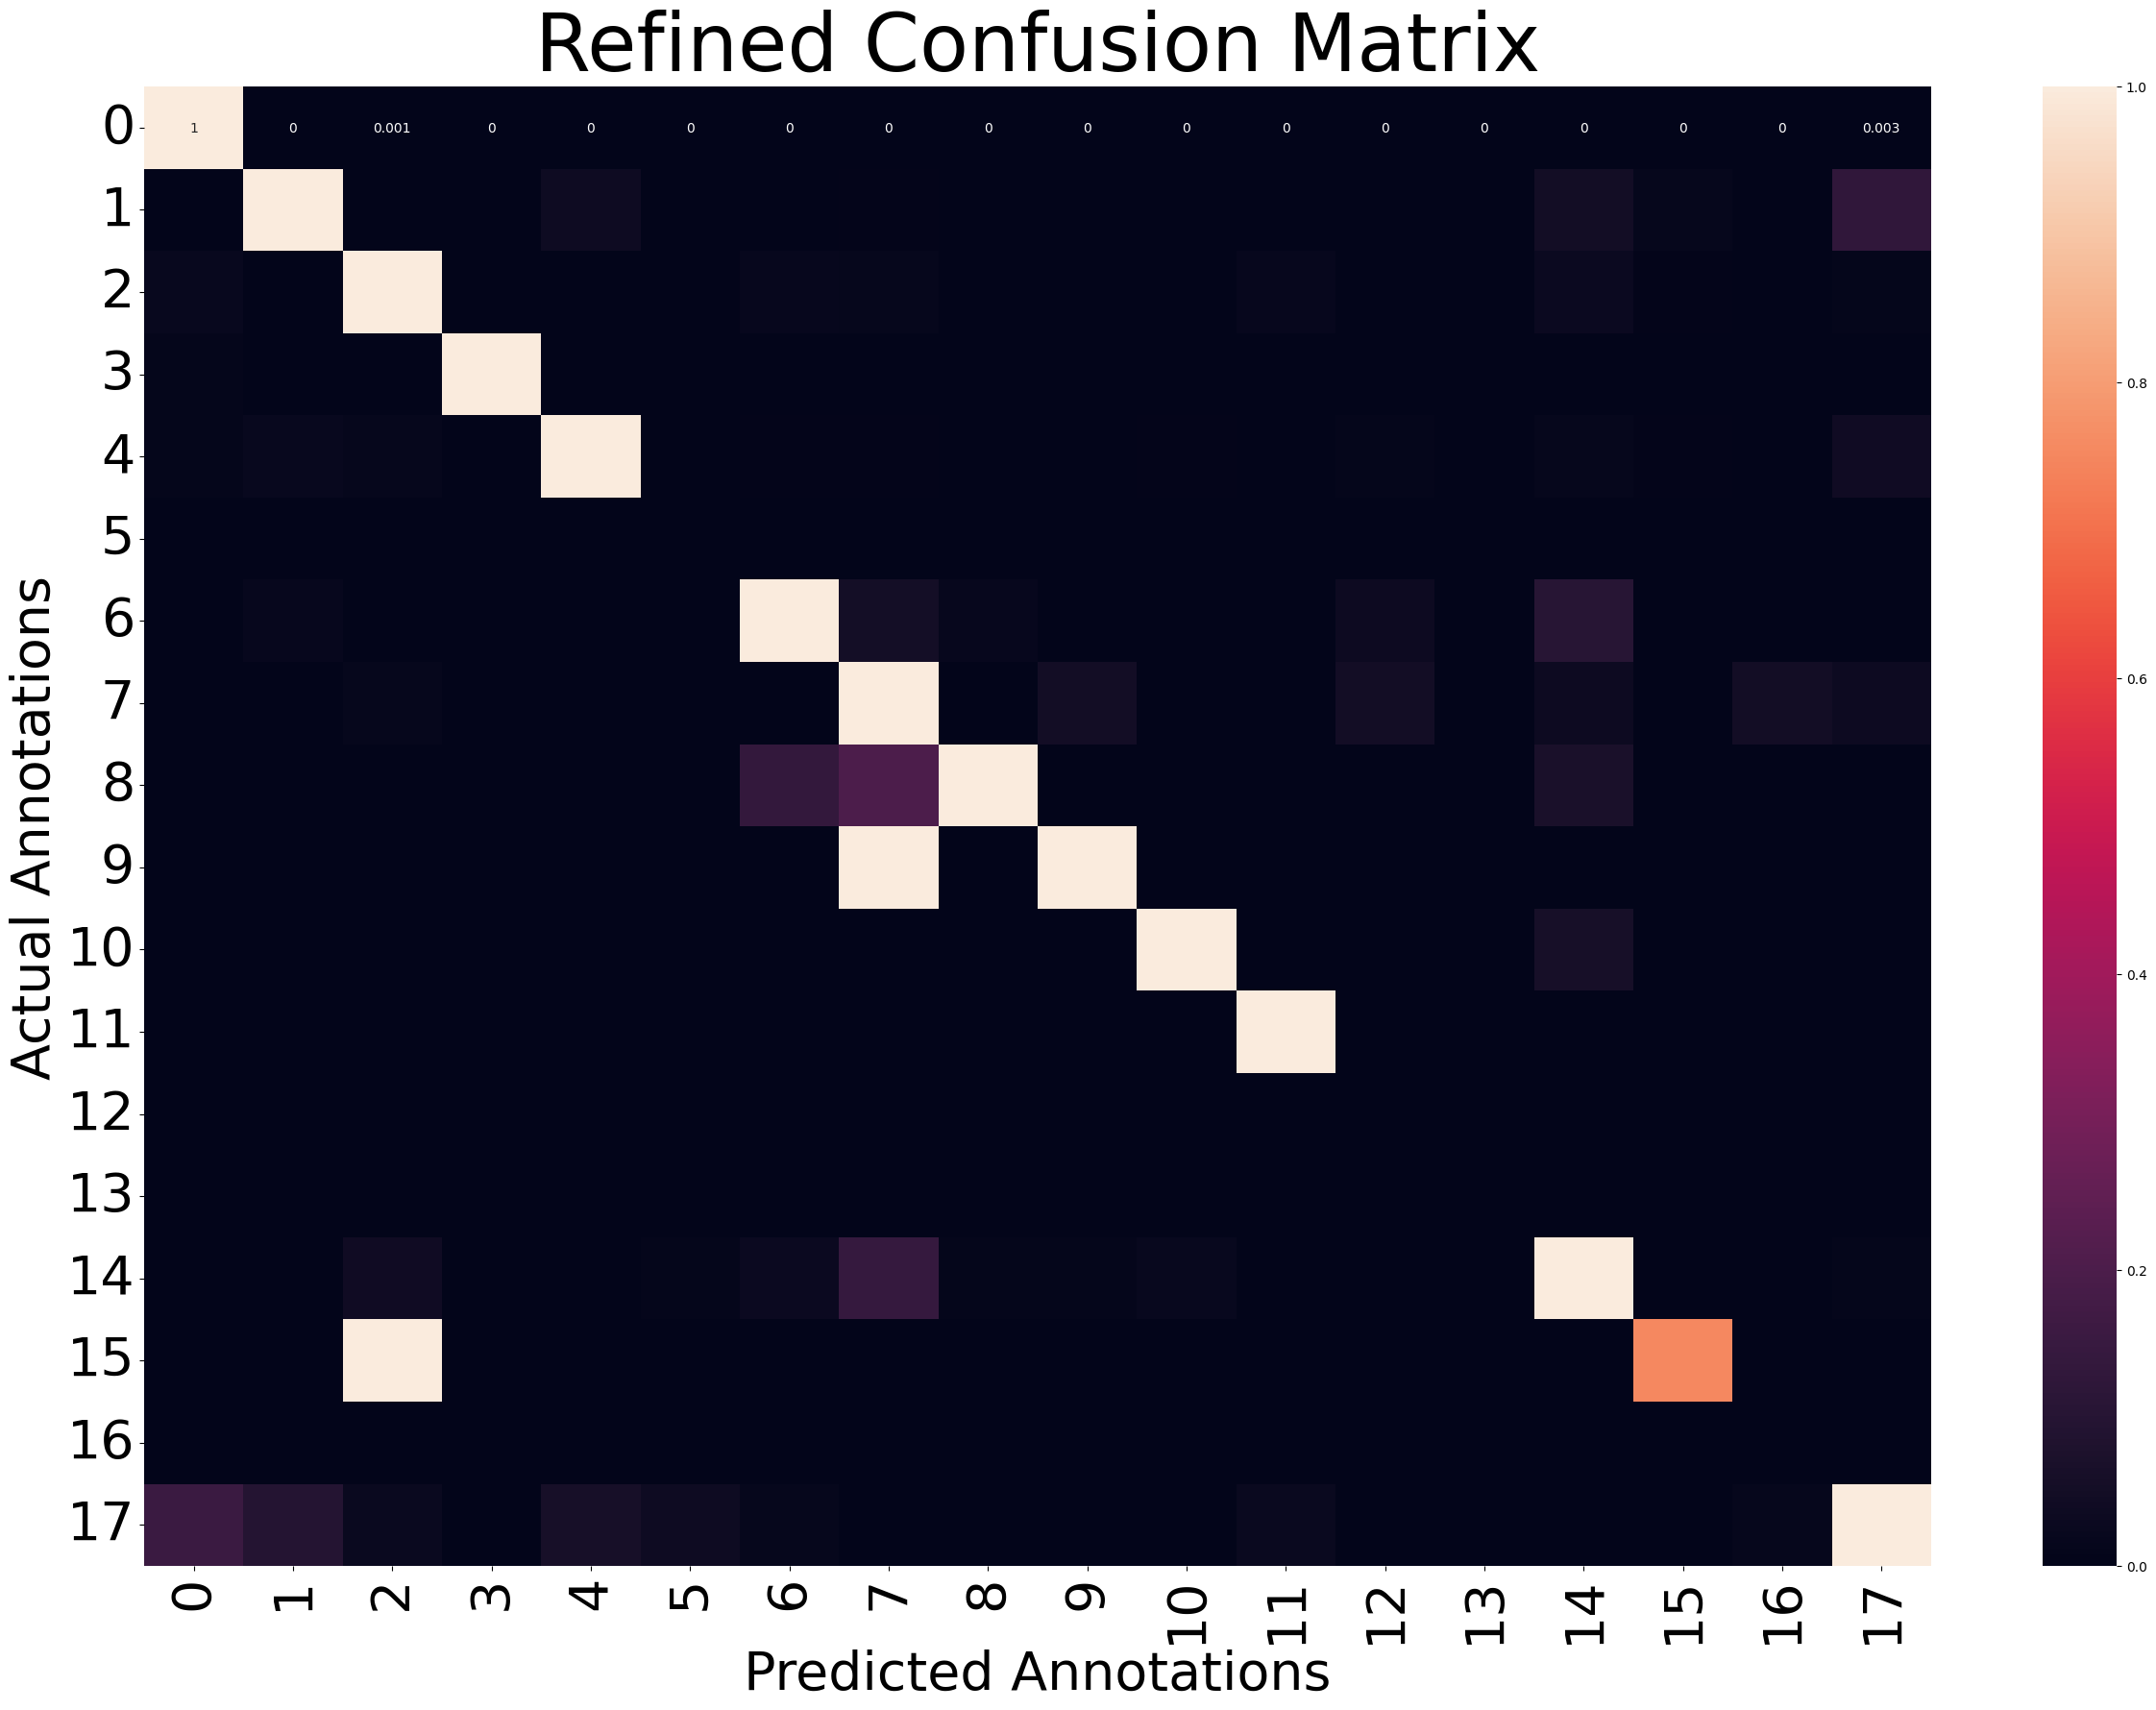

In [17]:
C_M = confusion_matrix(classes,school_list,true_list) 


[0]
[1]
[2]
[3]
[4]
[]
[6]
[7]
[8]
[9, 7]
[10]
[11]
[]
[]
[14]
[2, 15]
[]
[17]
         0    1    2    3    4  5   6   7   8   9  10  11  12  13  14  15  16  \
0     2105    0    0    0    0  0   0   0   0   0   0   0   0   0   0   0   0   
1        0  165    0    0    0  0   0   0   0   0   0   0   0   0   0   0   0   
2        0    0  254    0    0  0   0   0   0   0   0   0   0   0   0   0   0   
3        0    0    0  104    0  0   0   0   0   0   0   0   0   0   0   0   0   
4        0    0    0    0  251  0   0   0   0   0   0   0   0   0   0   0   0   
         0    0    0    0    0  0   0   0   0   0   0   0   0   0   0   0   0   
6        0    0    0    0    0  0  57   0   0   0   0   0   0   0   0   0   0   
7        0    0    0    0    0  0   0  86   0   0   0   0   0   0   0   0   0   
8        0    0    0    0    0  0   0   0  15   0   0   0   0   0   0   0   0   
7+9      0    0    0    0    0  0   0   0   0  14   0   0   0   0   0   0   0   
10       0    0    0    0    0

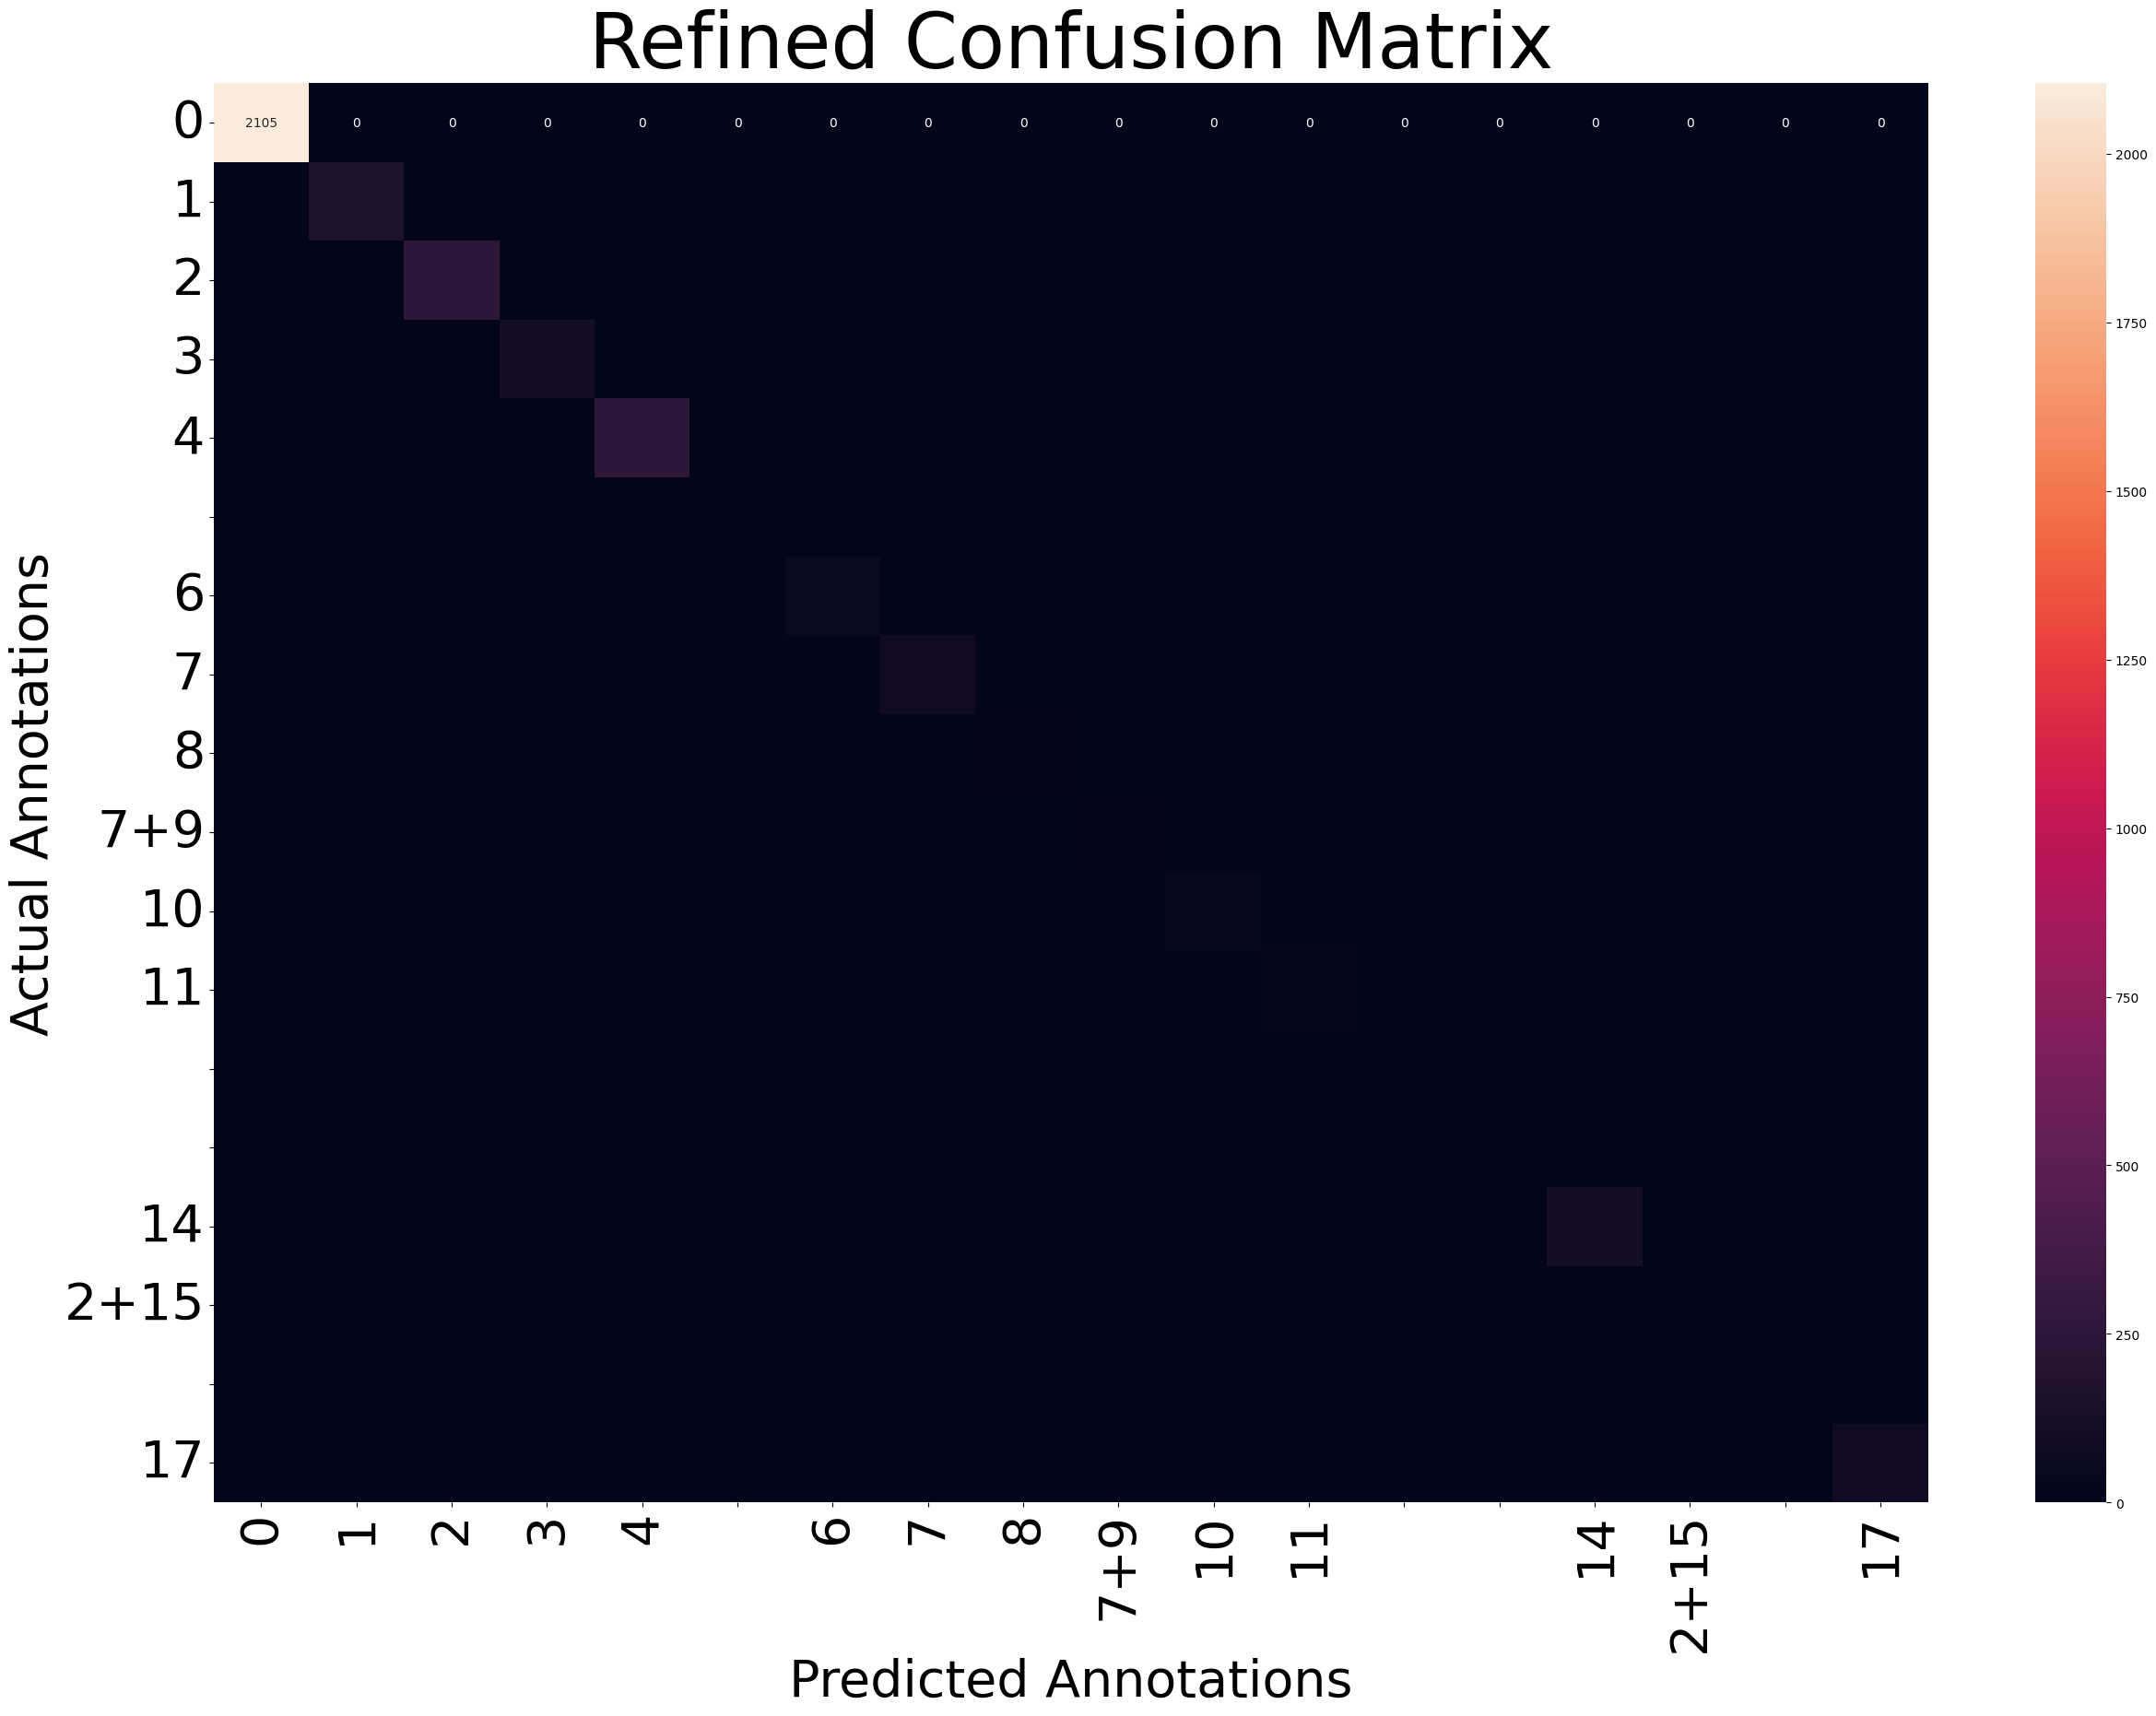

C:\Users\Aadiv Das\AppData\Local\Temp\ipykernel_9804\1820146074.py:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  MM_Normalized = MM.astype('float') / MM.max(axis=1)[:, np.newaxis]


        0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
8     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
7+9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
10    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
11    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

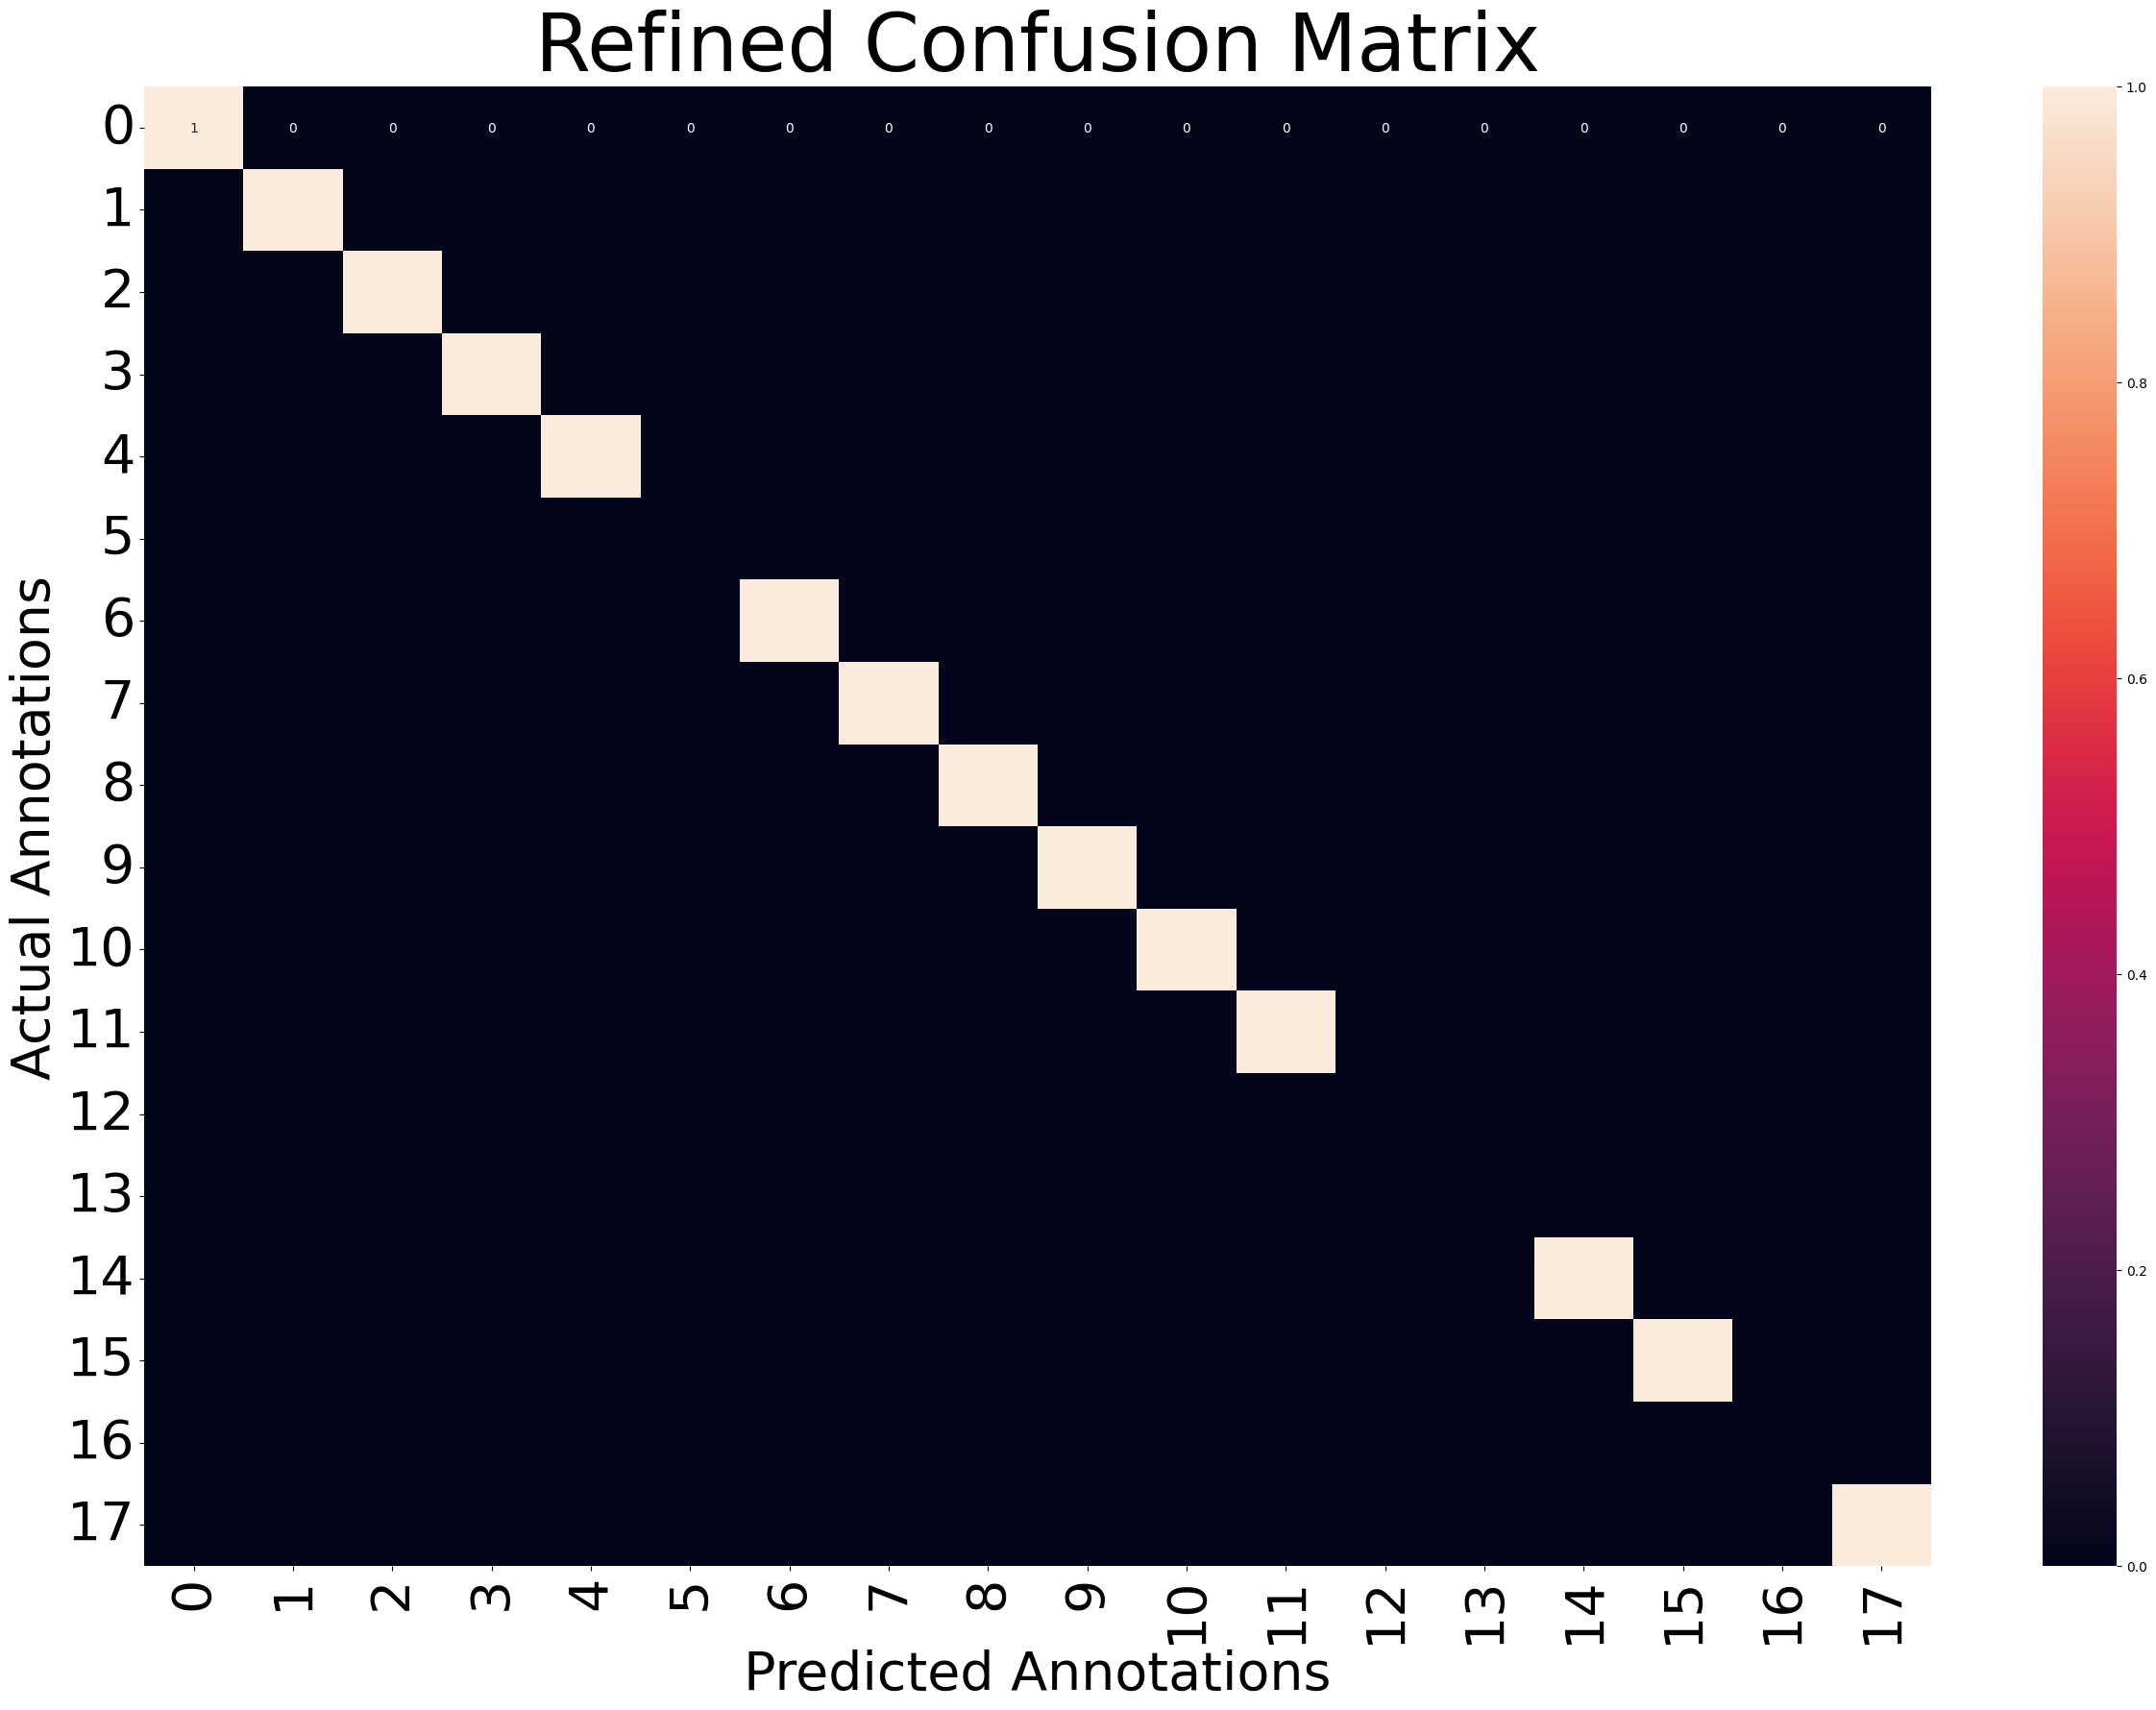

In [18]:
threshold = 0.4
MM = merged_matrix(C_M,num_classes, threshold)

Sum of rows:
 0       2105
1        165
2        254
3        104
4        251
           0
6         57
7         86
8         15
7+9       14
10        33
11        21
           0
           0
14        99
2+15       7
           0
17        84
dtype: int64
[5, 12, 13, 16]
         0    1    2    3    4   6   7   8   9  10  11  14  15  17
0     2105    0    0    0    0   0   0   0   0   0   0   0   0   0
1        0  165    0    0    0   0   0   0   0   0   0   0   0   0
2        0    0  254    0    0   0   0   0   0   0   0   0   0   0
3        0    0    0  104    0   0   0   0   0   0   0   0   0   0
4        0    0    0    0  251   0   0   0   0   0   0   0   0   0
6        0    0    0    0    0  57   0   0   0   0   0   0   0   0
7        0    0    0    0    0   0  86   0   0   0   0   0   0   0
8        0    0    0    0    0   0   0  15   0   0   0   0   0   0
7+9      0    0    0    0    0   0   0   0  14   0   0   0   0   0
10       0    0    0    0    0   0   0   0   0  33   

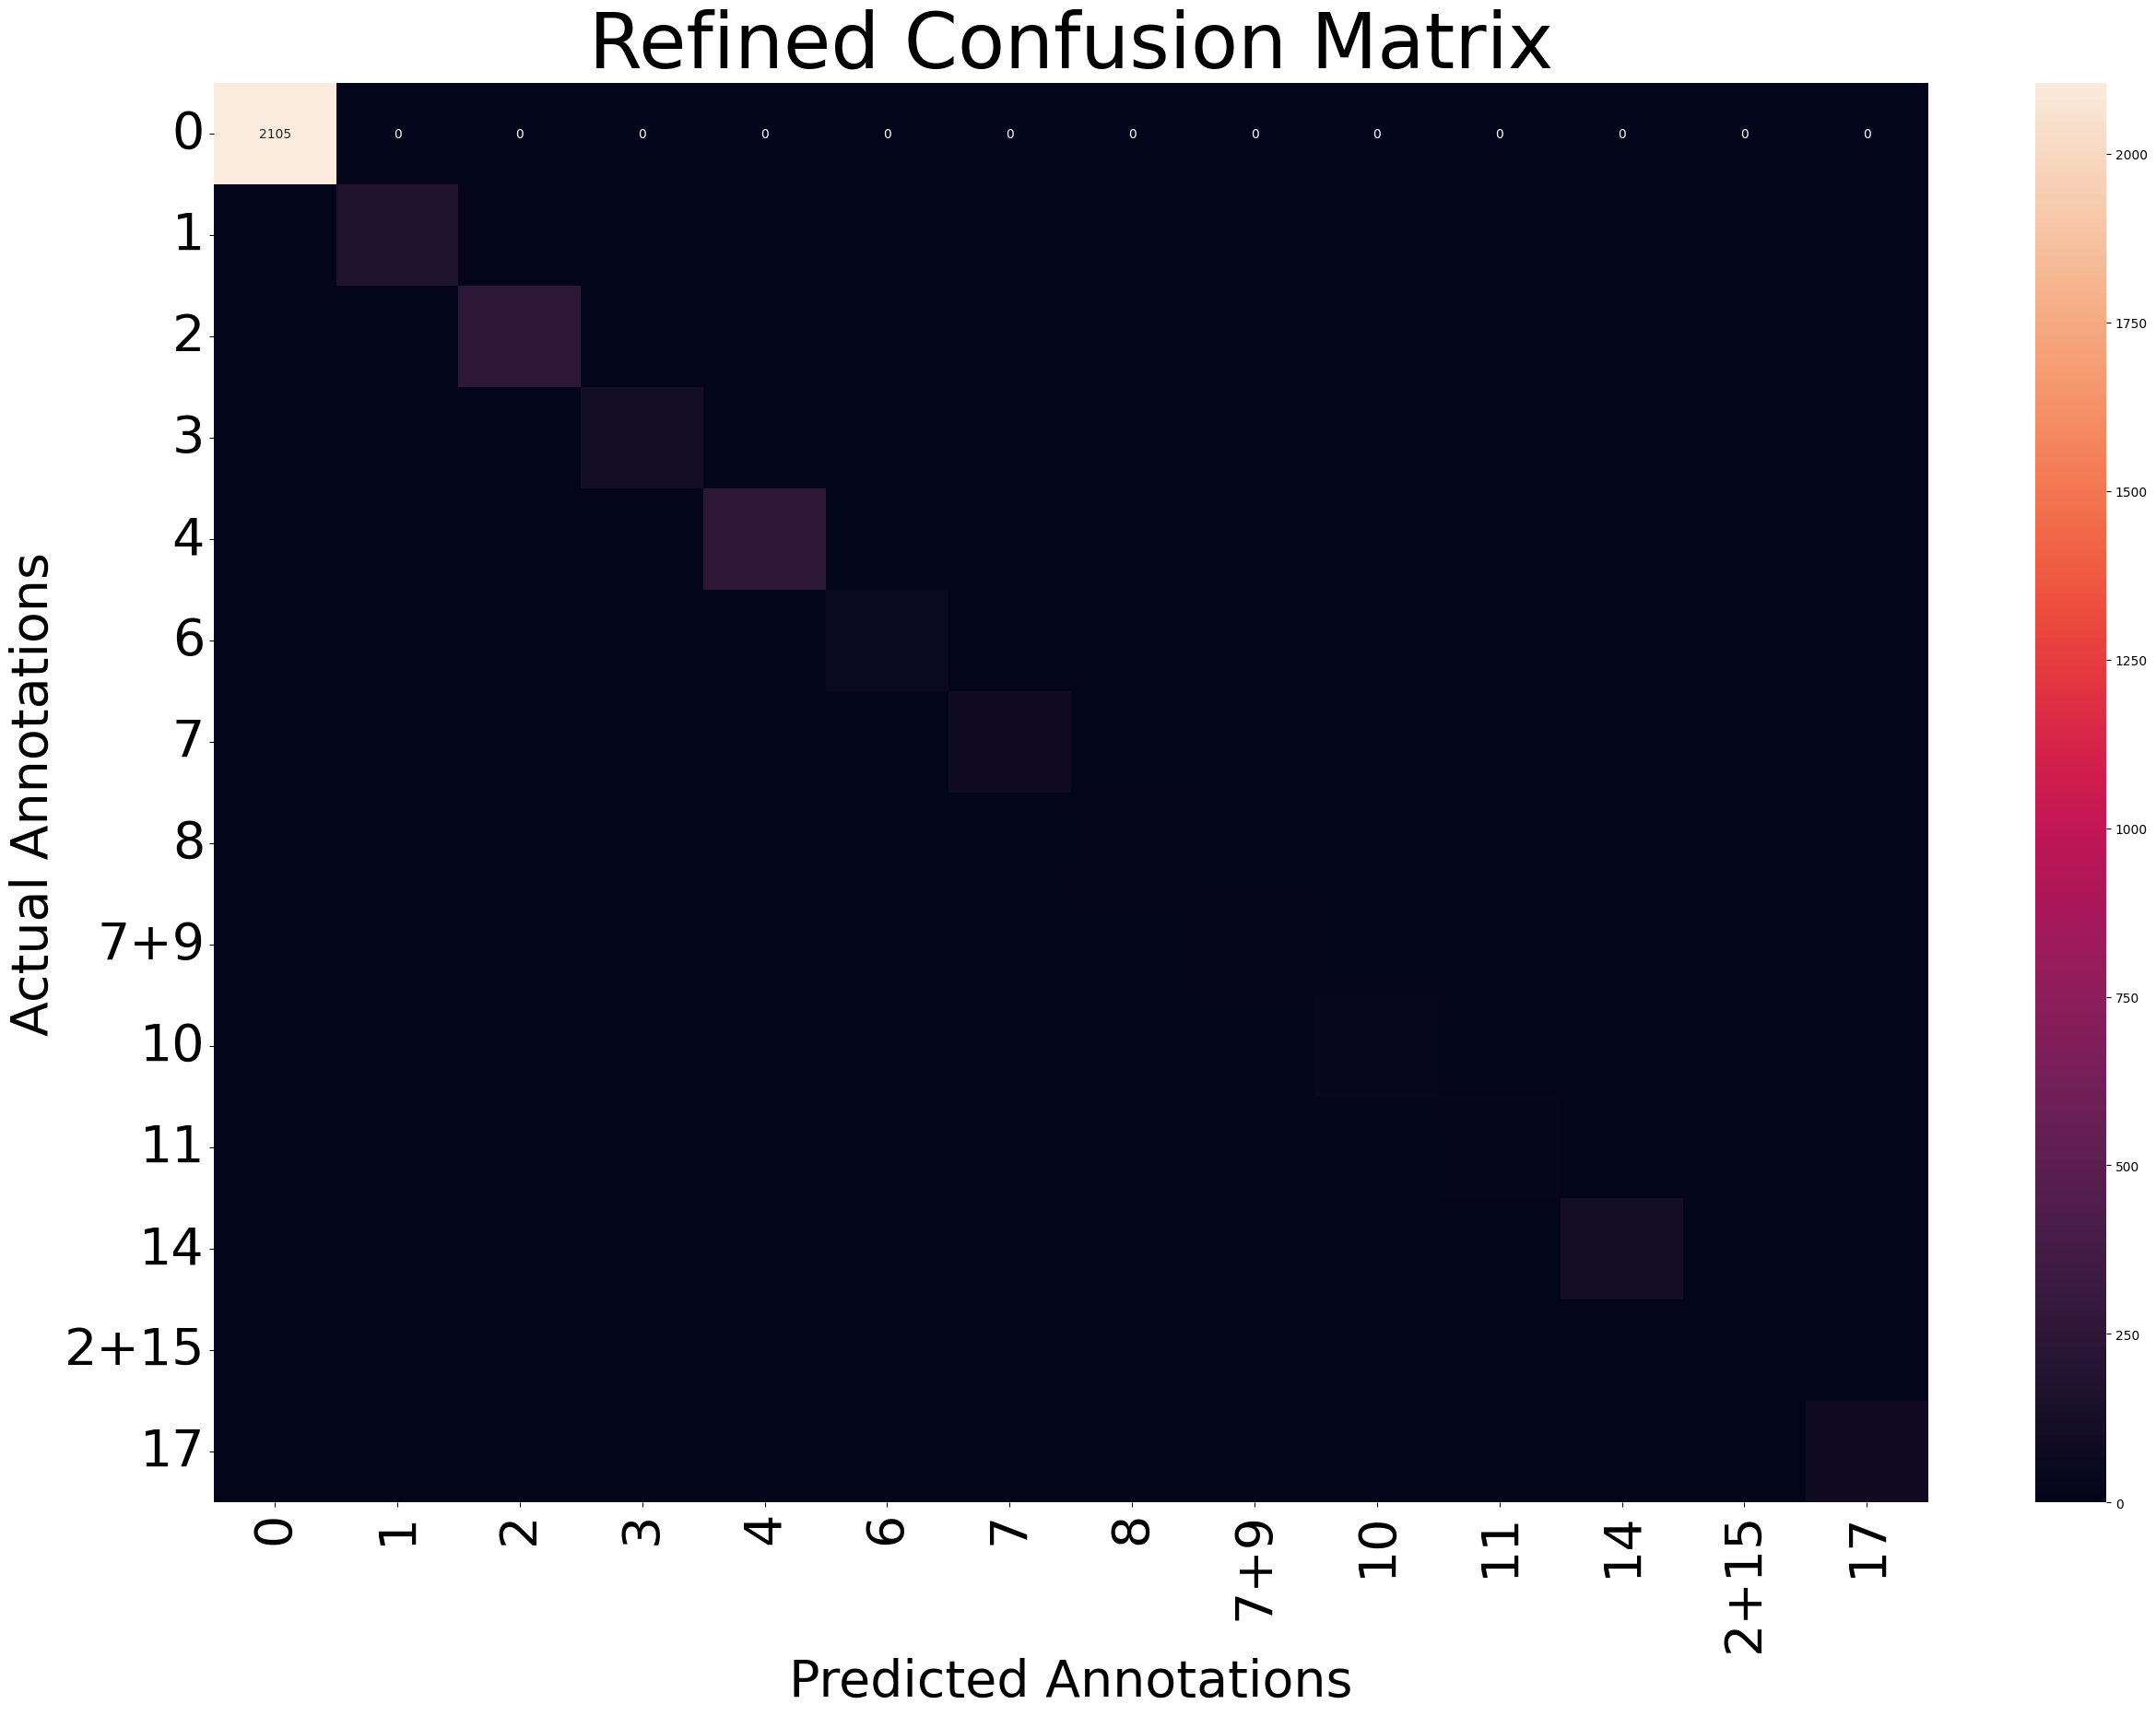

C:\Users\Aadiv Das\AppData\Local\Temp\ipykernel_9804\2600253697.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  MM_Normalized = MM.astype('float') / MM.max(axis=1)[:, np.newaxis]


        0    1    2    3    4    6    7    8    9   10   11   14   15   17
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
7+9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
10    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
11    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
14    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2+15  0.0  0.0  0.0  0.0 

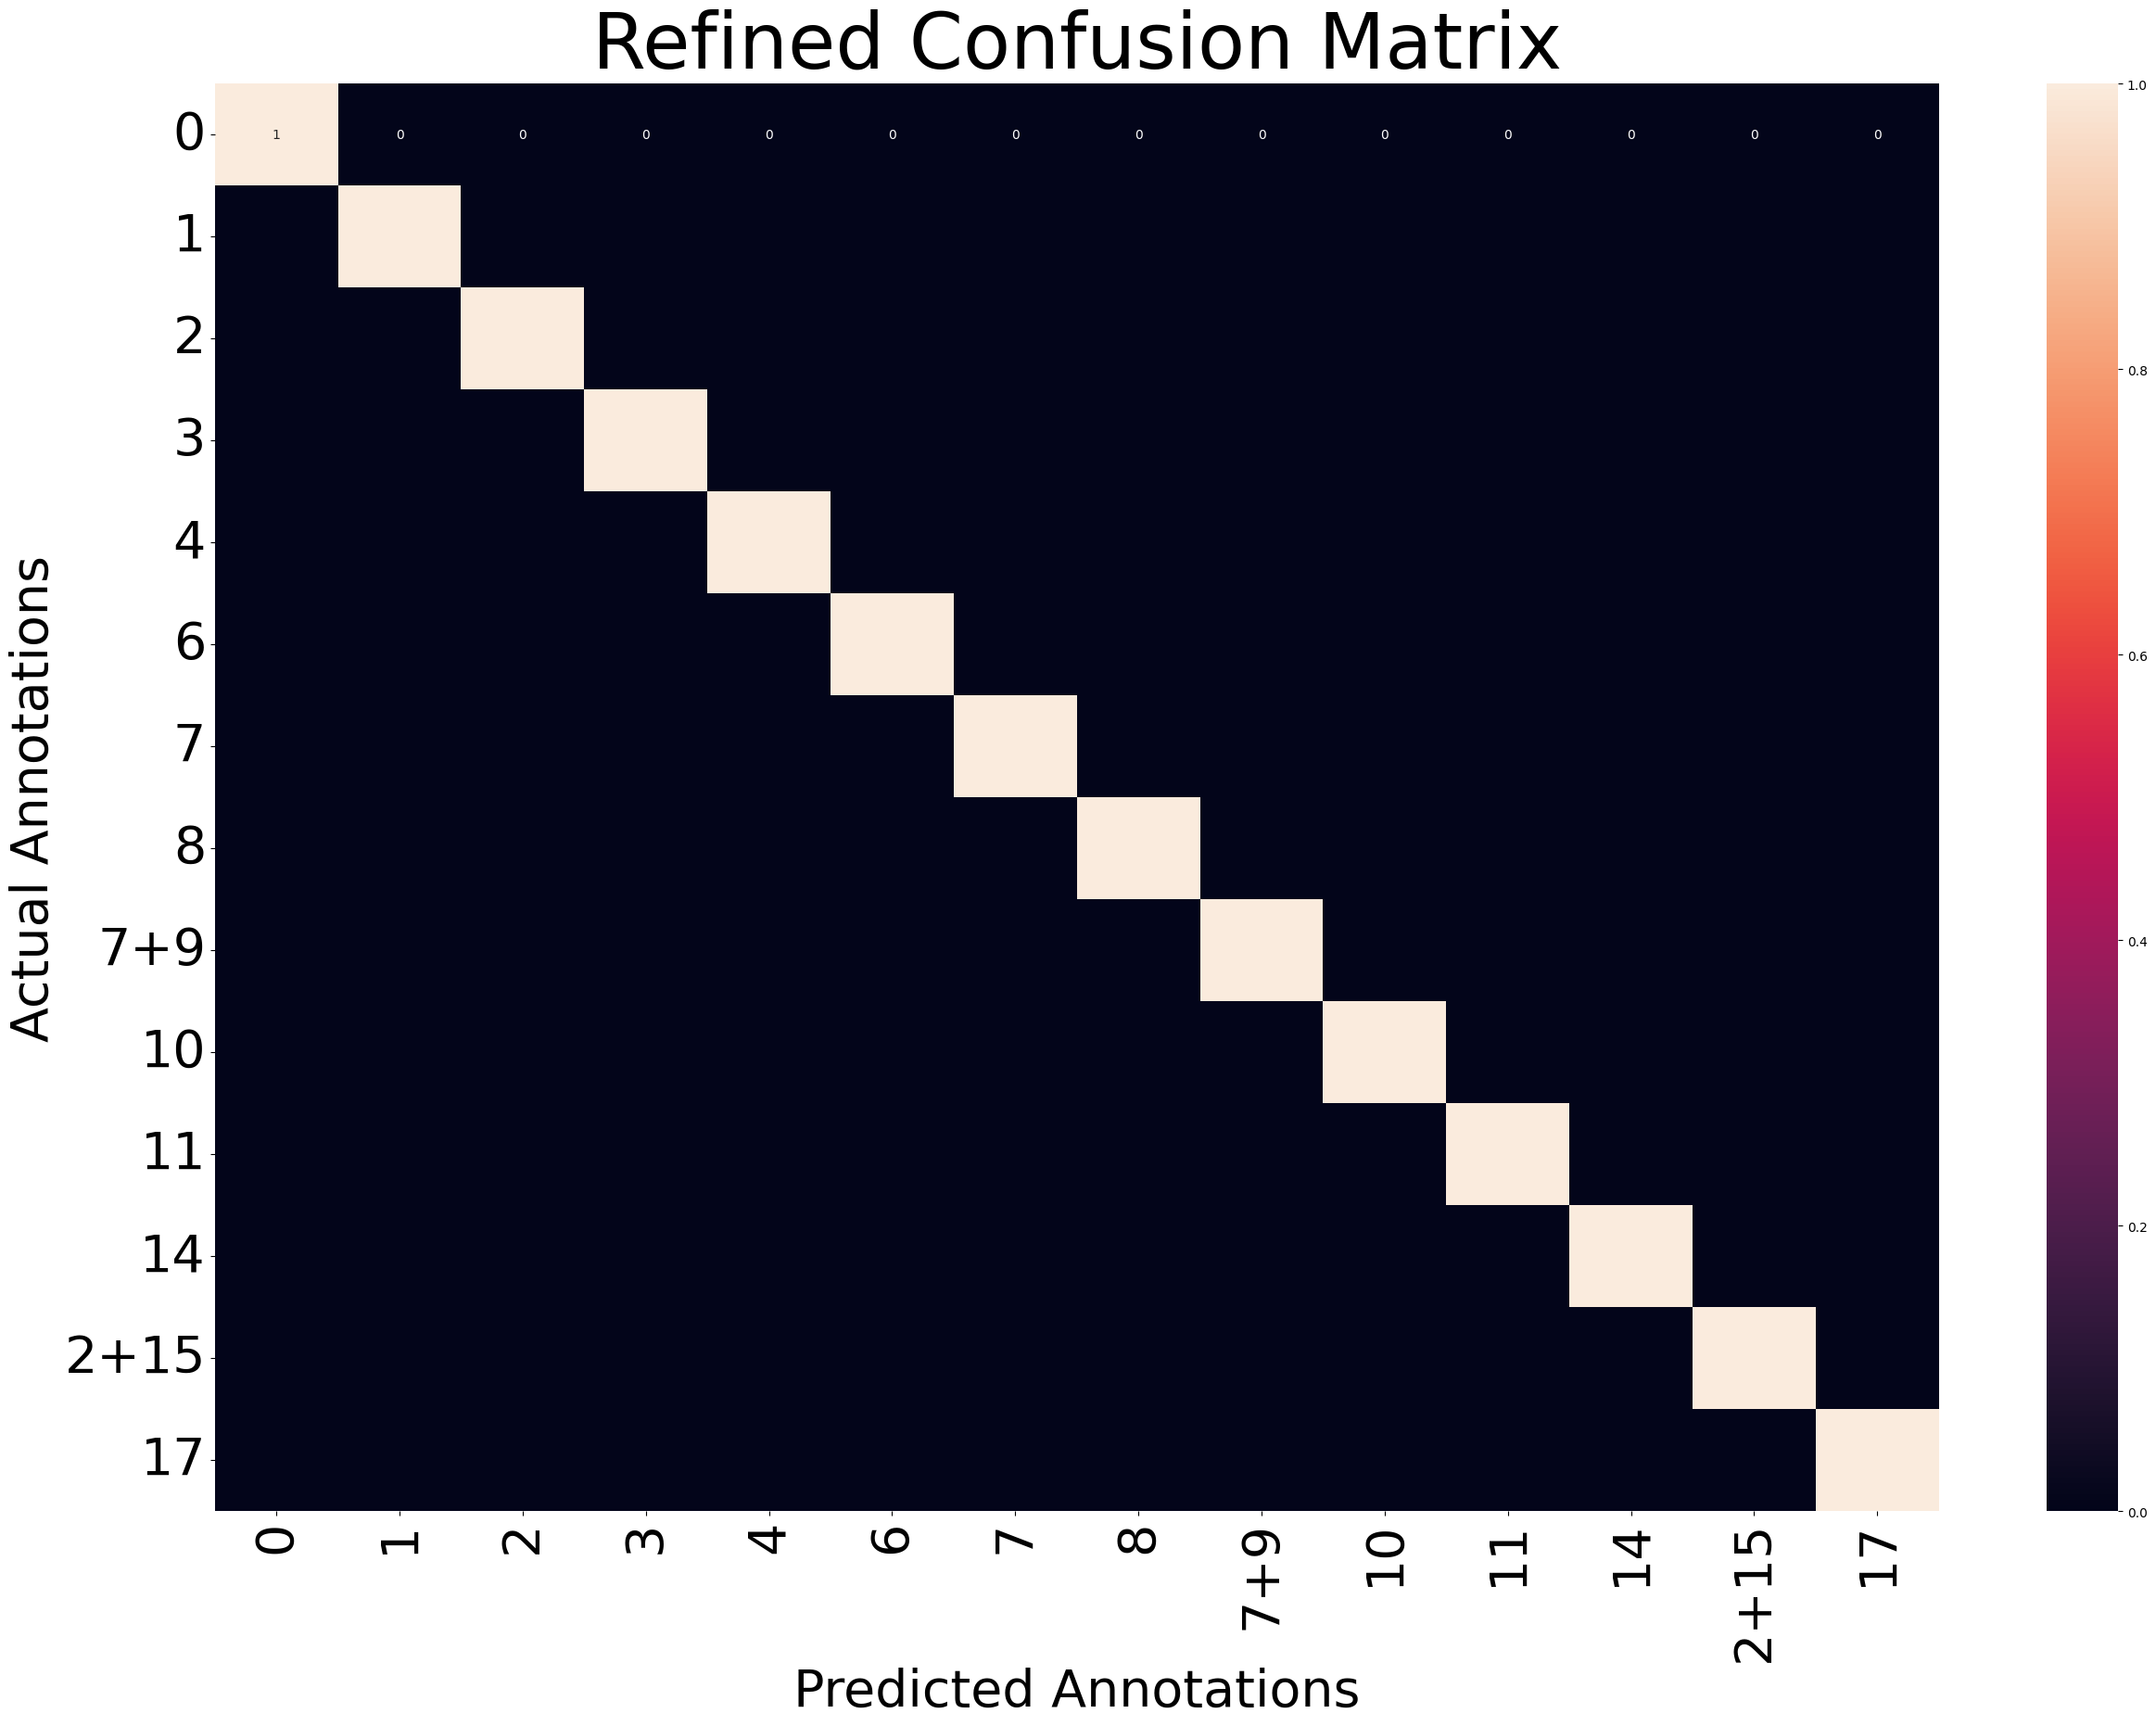

In [19]:
new_MM, index = new_matrix(MM)

Classes disappering after merging to threshold: [5, 12, 13, 16]
relevant_classes: ['5', '6', '7', '8', '9', '11', '12', '13', '14', '16']
irrelevant_classes: ['0', '1', '2', '3', '4', '15', '17', 5, 12, 13, 16]
            relevant  irrelevant
relevant         292           0
irrelevant         0        3003


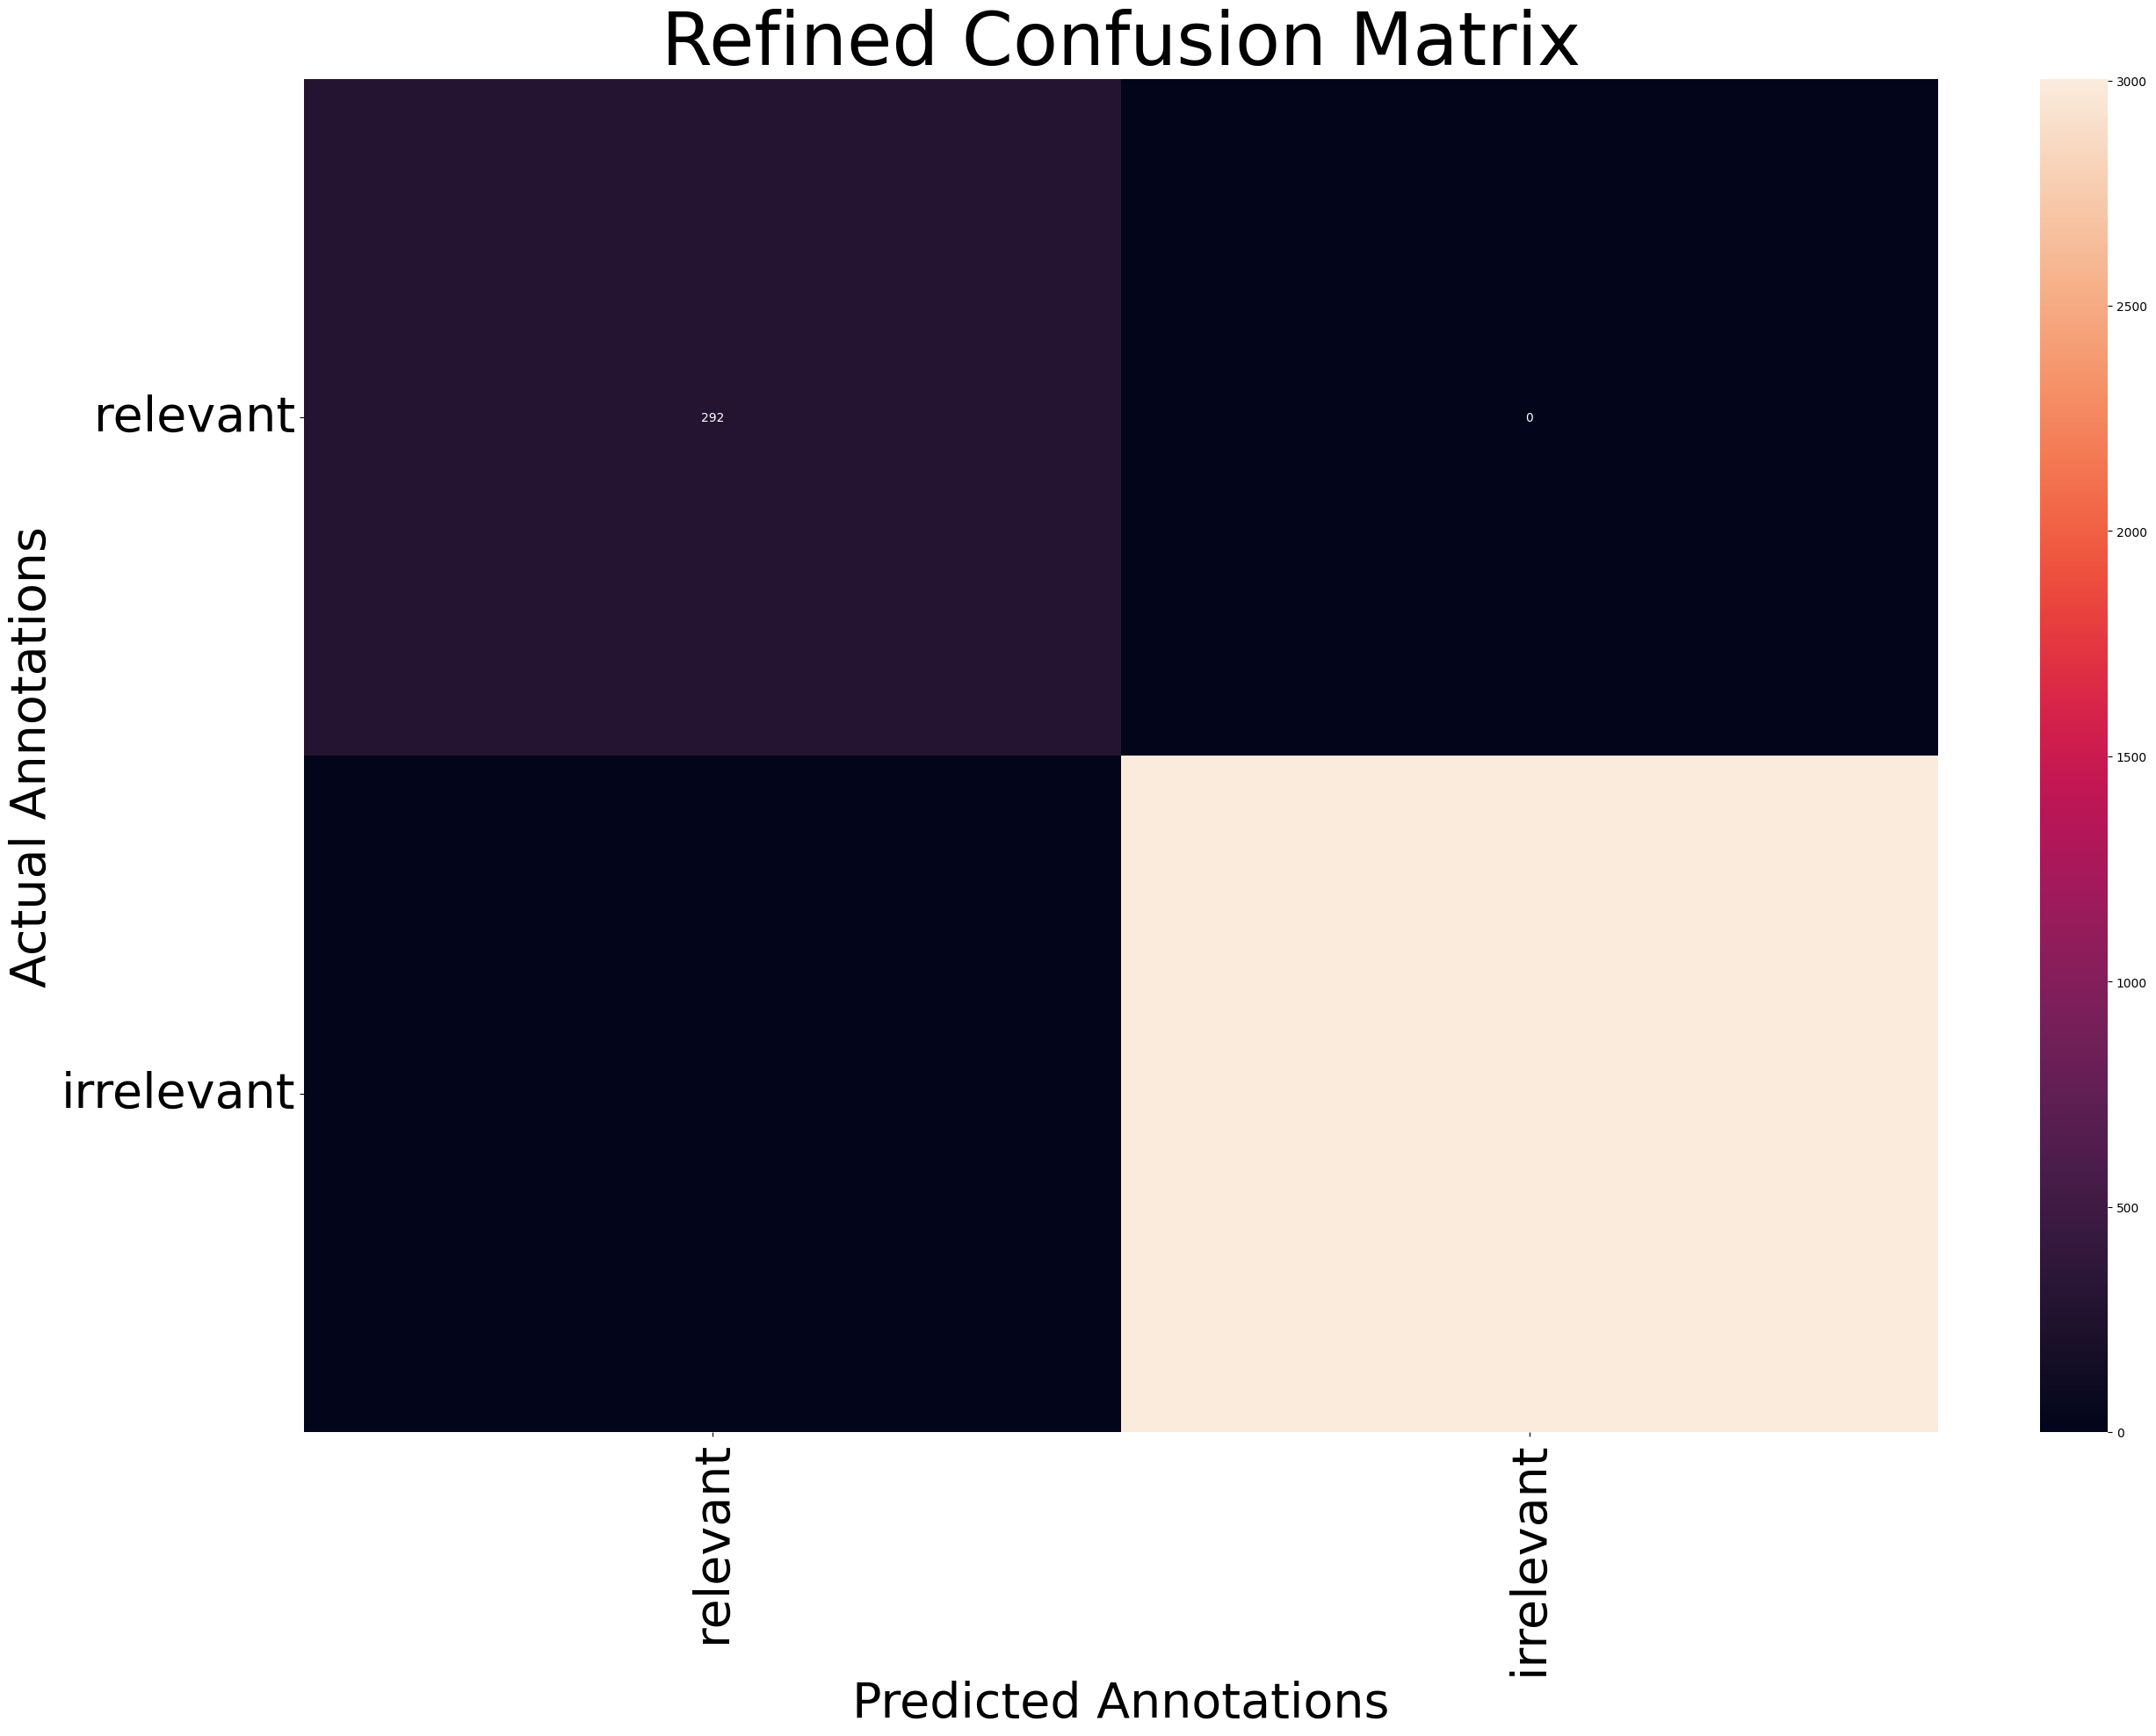

In [20]:
print("Classes disappering after merging to threshold:",index)
relevant_classes = [x for x in classes_relevant if x not in index]
irrelevant_classes = classes_irrelevant + index
print('relevant_classes:',relevant_classes) 
print('irrelevant_classes:',irrelevant_classes)     
 
sub_matrix(MM, relevant_classes, irrelevant_classes)

In [21]:
print("Inter-Rater agreement: ",kd.alpha(np.array(school_list))*100,"%")  #Inter-Annotator agreement assuming nominal categories

Inter-Rater agreement:  72.25031997537045 %


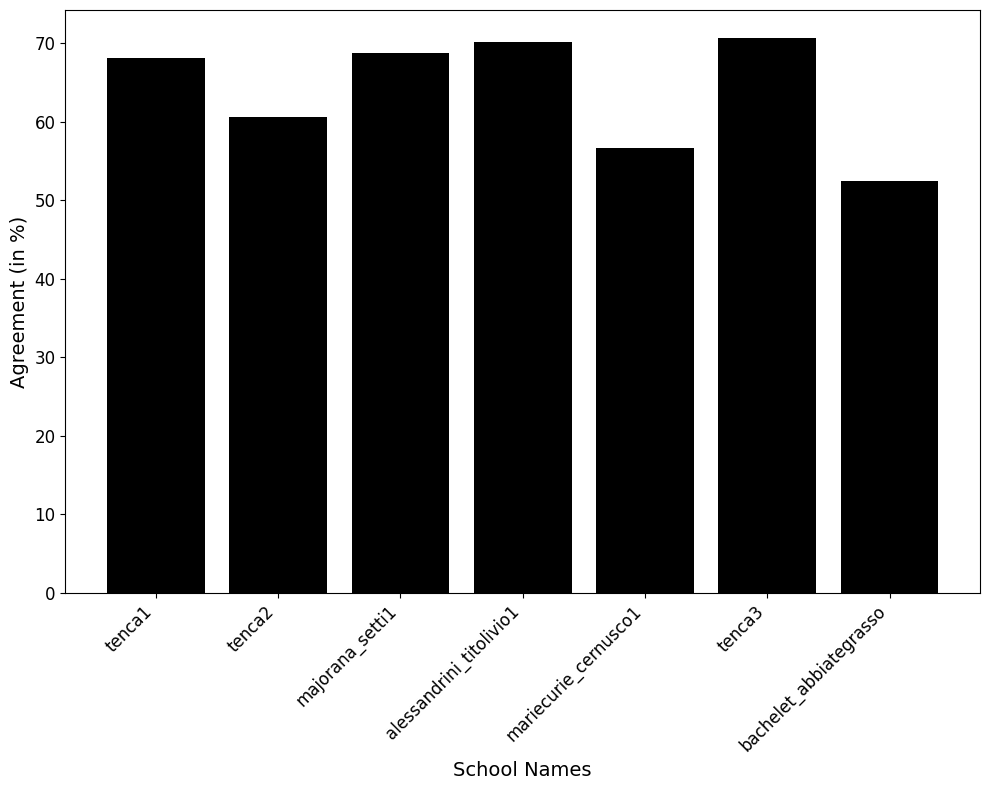

In [23]:
bar_list = [IntraRater(tenca1),IntraRater(tenca2),IntraRater(majorana_setti1),IntraRater(alessandrini_titolivio1),IntraRater(mariecurie_cernusco1),
             IntraRater(tenca3),IntraRater(bachelet_abbiategrasso)]

names = ['tenca1','tenca2','majorana_setti1','alessandrini_titolivio1','mariecurie_cernusco1',
         'tenca3','bachelet_abbiategrasso']

plot_intra_rater_agreement(bar_list, names)